In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [37]:
# download the checkpoint demo
# !mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints
# config_file = './checkpoints/rtmdet_tiny_8xb32-300e_coco.py'
# checkpoint_file = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

config_file = '../configs/crosskd/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco.py'
checkpoint_file = '../work_dirs/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco/epoch_24.pth'

In [38]:
#Register all modules in mmdet into the registries
register_all_modules()
model = init_detector(config_file, checkpoint_file, device='cuda:0')

Loads checkpoint by local backend from path: /Ziob/343312/CrossKD/work_dirs/fcos_r50-caffe_fpn_gn-head_1x_coco/epoch_36.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.layer3.6.bn1.running_mean, backbone.layer3.6.bn1.running_var, backbone.layer3.6.conv2.weight, backbone.layer3.6.bn2.weight, backbone.layer3.6.bn2.bias, backbone.layer3.6.bn2.running_mean, backbone.layer3.6.bn2.running_var, backbone.layer3.6.conv3.weight, backbone.layer3.6.bn3.weight, backbone.layer3.6.bn3.bias, backbone.layer3.6.bn3.running_mean, backbone.layer3.6.bn3.running_var, backbone.layer3.7.conv1.weight, backbone.layer3.7.bn1.weight, backbone.layer3.7.bn1.bias, backbone.layer3.7.bn1.running_mean, backbone.layer3.7.bn1.running_var, backbone.layer3.7.conv2.weight, backbone.layer3.7.bn2.weight, backbone.layer3.7.bn2.bias, backbone.layer3.7.bn2.running_mean, backbone.layer3.7

In [52]:
# test a single image
img = mmcv.imread( 'frame_003805.png', channel_order='rgb')
result = inference_detector(model, img)
print(result)

<DetDataSample(

    META INFORMATION
    batch_input_shape: (768, 1344)
    img_path: None
    img_id: 0
    scale_factor: (1.04140625, 1.0416666666666667)
    ori_shape: (720, 1280)
    pad_shape: (768, 1344)
    img_shape: (750, 1333)

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            bboxes: tensor([], device='cuda:0', size=(0, 4))
        ) at 0x7617a4a0a1c0>
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], device='cuda:0', dtype=torch.int64)
            bboxes: tensor([], device='cuda:0', size=(0, 4))
        ) at 0x7617a4a0a3d0>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
            

In [55]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

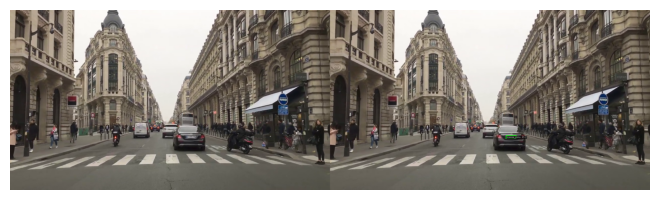

In [57]:

visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=True,
    wait_time=0,
)
visualizer.show()

In [3]:
def count_parameters(model):
    total = sum(p.numel() for p in model.parameters())
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total, trainable


In [4]:
import time
from mmengine.config import Config
from mmengine.registry import init_default_scope
from mmdet.apis import init_detector, inference_detector
import torch

# config_file = '../configs/fcos/fcos_r50-caffe_fpn_gn-head_1x_coco.py'
# checkpoint_file = '../work_dirs/fcos_r50-caffe_fpn_gn-head_1x_coco/epoch_36.pth'

config_file = '../configs/crosskd/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco.py'
checkpoint_file = '../work_dirs/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco/epoch_24.pth'

device = 'cuda:0'
image_path = 'frame_003805.png'

cfg = Config.fromfile(config_file)
init_default_scope(cfg.get('default_scope', 'mmdet'))
model = init_detector(config_file, checkpoint_file, device=device)

_ = inference_detector(model, image_path)

torch.cuda.synchronize()
start = time.time()
for _ in range(100):
    _ = inference_detector(model, image_path)
torch.cuda.synchronize()
end = time.time()

avg_time = (end - start) / 100
print(avg_time)
print(f'Average inference time: {avg_time * 1000:.2f} ms')
print(f'FPS: {1 / avg_time:.2f}')

total_params, trainable_params = count_parameters(model)
print(f'Total parameters: {total_params:,}')
print(f'Trainable parameters: {trainable_params:,}')

Loads checkpoint by local backend from path: /Ziob/343312/CrossKD/work_dirs/fcos_r50-caffe_fpn_gn-head_1x_coco/epoch_36.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.layer3.6.bn1.running_mean, backbone.layer3.6.bn1.running_var, backbone.layer3.6.conv2.weight, backbone.layer3.6.bn2.weight, backbone.layer3.6.bn2.bias, backbone.layer3.6.bn2.running_mean, backbone.layer3.6.bn2.running_var, backbone.layer3.6.conv3.weight, backbone.layer3.6.bn3.weight, backbone.layer3.6.bn3.bias, backbone.layer3.6.bn3.running_mean, backbone.layer3.6.bn3.running_var, backbone.layer3.7.conv1.weight, backbone.layer3.7.bn1.weight, backbone.layer3.7.bn1.bias, backbone.layer3.7.bn1.running_mean, backbone.layer3.7.bn1.running_var, backbone.layer3.7.conv2.weight, backbone.layer3.7.bn2.weight, backbone.layer3.7.bn2.bias, backbone.layer3.7.bn2.running_mean, backbone.layer3.7

In [5]:
config_file = '../configs/fcos/fcos_r50-caffe_fpn_gn-head_1x_coco.py'
checkpoint_file = '../work_dirs/fcos_r50-caffe_fpn_gn-head_1x_coco/epoch_36.pth'

# config_file = '../configs/crosskd/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco.py'
# checkpoint_file = '../work_dirs/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco/epoch_24.pth'

device = 'cuda:0'
# image_path = 'demo.jpg' 
image_path = 'frame_003805.png'

cfg = Config.fromfile(config_file)
init_default_scope(cfg.get('default_scope', 'mmdet'))
model = init_detector(config_file, checkpoint_file, device=device)

_ = inference_detector(model, image_path)

torch.cuda.synchronize()
start = time.time()
for _ in range(100):
    _ = inference_detector(model, image_path)
torch.cuda.synchronize()
end = time.time()

avg_time = (end - start) / 100
print(avg_time)
print(f'Average inference time: {avg_time * 1000:.2f} ms')
print(f'FPS: {1 / avg_time:.2f}')

total_params, trainable_params = count_parameters(model)
print(f'Total parameters: {total_params:,}')
print(f'Trainable parameters: {trainable_params:,}')


Loads checkpoint by local backend from path: ../work_dirs/fcos_r50-caffe_fpn_gn-head_1x_coco/epoch_36.pth
0.07847801208496094
Average inference time: 78.48 ms
FPS: 12.74
Total parameters: 32,181,324
Trainable parameters: 31,905,804


In [11]:
config_file = '../configs/ld/ld_r50-gflv1-r101_fpn_1x_coco.py'
checkpoint_file = '../work_dirs/ld_r50-gflv1-r101_fpn_1x_coco/epoch_36.pth'

# config_file = '../configs/crosskd/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco.py'
# checkpoint_file = '../work_dirs/crosskd_r50_fcos_r101-2x-ms_caffe_fpn_gn-head_2x_ms_coco/epoch_24.pth'

device = 'cuda:0'
# image_path = 'demo.jpg' 
image_path = 'frame_003805.png'

cfg = Config.fromfile(config_file)
init_default_scope(cfg.get('default_scope', 'mmdet'))
model = init_detector(config_file, checkpoint_file, device=device)

_ = inference_detector(model, image_path)

torch.cuda.synchronize()
start = time.time()
for _ in range(100):
    _ = inference_detector(model, image_path)
torch.cuda.synchronize()
end = time.time()

avg_time = (end - start) / 100
print(avg_time)
print(f'Average inference time: {avg_time * 1000:.2f} ms')
print(f'FPS: {1 / avg_time:.2f}')

total_params, trainable_params = count_parameters(model)
print(f'Total parameters: {total_params:,}')
print(f'Trainable parameters: {trainable_params:,}')


Loads checkpoint by local backend from path: /Ziob/343312/CrossKD/work_dirs/fcos_r50-caffe_fpn_gn-head_1x_coco/epoch_36.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.layer3.6.conv1.weight, backbone.layer3.6.bn1.weight, backbone.layer3.6.bn1.bias, backbone.layer3.6.bn1.running_mean, backbone.layer3.6.bn1.running_var, backbone.layer3.6.conv2.weight, backbone.layer3.6.bn2.weight, backbone.layer3.6.bn2.bias, backbone.layer3.6.bn2.running_mean, backbone.layer3.6.bn2.running_var, backbone.layer3.6.conv3.weight, backbone.layer3.6.bn3.weight, backbone.layer3.6.bn3.bias, backbone.layer3.6.bn3.running_mean, backbone.layer3.6.bn3.running_var, backbone.layer3.7.conv1.weight, backbone.layer3.7.bn1.weight, backbone.layer3.7.bn1.bias, backbone.layer3.7.bn1.running_mean, backbone.layer3.7.bn1.running_var, backbone.layer3.7.conv2.weight, backbone.layer3.7.bn2.weight, backbone.layer3.7.bn2.bias, backbone.layer3.7.bn2.running_mean, backbone.layer3.7